In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

rcParams['figure.figsize'] = 20,10

In [2]:
#read the file
df_unprocessed = pd.read_csv('AAPL.csv')

#print the head
df_unprocessed.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,68.687538,140129500
1,2013-01-03,78.268570,78.524284,77.285713,77.442856,67.820526,88241300
2,2013-01-04,76.709999,76.947144,75.118568,75.285713,65.931404,148583400
3,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.543602,121039100
4,2013-01-08,75.601425,75.984283,74.464287,75.044289,65.719994,114676800


In [3]:
len(df_unprocessed)

1840

In [4]:
df = df_unprocessed.iloc[:, 1:2].values
print(df)

[[ 79.117142]
 [ 78.26857 ]
 [ 76.709999]
 ...
 [276.279999]
 [273.609985]
 [275.869995]]


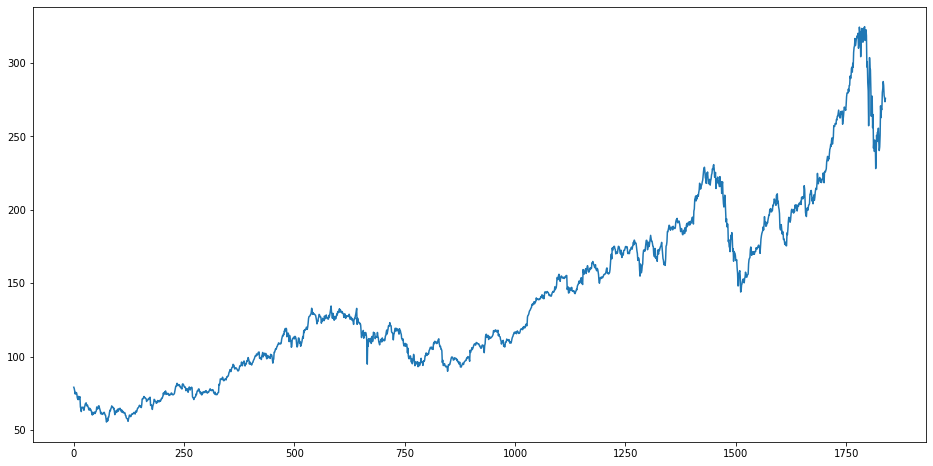

In [5]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df, label='Close Price history')
plt.show()

In [6]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [16]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaled = scaler.fit_transform(df)
features_set = []
labels = []

train_size = int(0.8*len(df))
print(test_size)
test = df[train_size:]
print(len(test))

for i in range(60, train_size):
    features_set.append(scaled[i-60:i, 0])
    labels.append(scaled[i, 0])
    
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

1472
368


In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(features_set, labels, epochs = 31, batch_size = 32)

#save the model so that I dont need to run it again
model.save('lstm_model.h5')

Epoch 1/31
1412/1412 [==============================] - 24s 17ms/step - loss: 0.0090
Epoch 2/31
1412/1412 [==============================] - 19s 14ms/step - loss: 0.0014
Epoch 3/31
1412/1412 [==============================] - 19s 13ms/step - loss: 0.0013
Epoch 4/31
1412/1412 [==============================] - 20s 14ms/step - loss: 0.0013
Epoch 5/31
1412/1412 [==============================] - 19s 13ms/step - loss: 0.0012
Epoch 6/31
1412/1412 [==============================] - 18s 13ms/step - loss: 0.0011
Epoch 7/31
1412/1412 [==============================] - 20s 14ms/step - loss: 0.0012
Epoch 8/31
1412/1412 [==============================] - 20s 14ms/step - loss: 9.9300e-04
Epoch 9/31
1412/1412 [==============================] - 20s 14ms/step - loss: 9.4389e-04
Epoch 10/31
1412/1412 [==============================] - 19s 14ms/step - loss: 9.5537e-04
Epoch 11/31
1412/1412 [==============================] - 19s 13ms/step - loss: 0.0011
Epoch 12/31
1412/1412 [============================

In [22]:
#load model from the file
model = load_model('lstm_model.h5')

apple_testing_processed = test
test_inputs = df_unprocessed['Open'][train_size - 60:].values
print(len(test_inputs), len(test))
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

428 368


In [26]:
test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_inputs[i-60:i, 0])
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

368


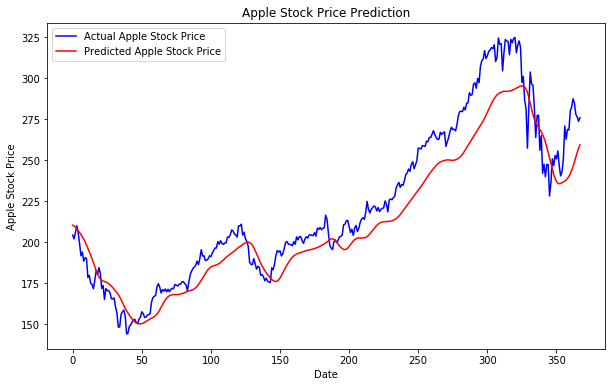

In [27]:
predictions = model.predict(test_features)
print(len(predictions))
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()